#### Author : Maximiliano Lopez Salgado
#### First commit: 2023-05-10
#### Last commit: 2023-05-25
#### Description: This notebook is used to perform EDA on the bike data set

In [166]:
# import ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import folium
from folium.plugins import HeatMap
import requests
import polyline
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import requests
import json
import osmnx as ox

<center><h1>Exploratory Data Analysis</center></h1>

#### Formulate some hypothesis and plot the data to check if the hypothesis are true. 
#### I.E: Hourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well. 
#### Daily Trend: weekdays vs weekends and registered users vs casual users.. 
#### Rain: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days..
#### Temperature: in warm countries, temperature generally keeps people inside. You have to check Washington DC's temperature for making any guess.. 
#### Business model: businesses often rely on registered customers more than casual users. There might be some interesting insights that can strengthen this assumption.

# Rentals_time_weather dataset

In [167]:
# import rentals_time_weather data
rentals_time_weather = pd.read_csv('/Users/maximilianolopezsalgado/data_projects/capital_bike_sharing/datasets/rentals_time_weather.csv')

# print first 5 rows
rentals_time_weather.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,...,apparent_temp,humidity,windspeed,casual_user,registered_user,count,day_period,warmness,humidity_level,windspeed_level
0,1,2011-01-01,Winter,2011,January,0,No,Sunday,No,Clear,...,3.0014,0.81,0.0,3,13,16,Dawn,Cold,High,Low
1,2,2011-01-01,Winter,2011,January,1,No,Sunday,No,Clear,...,1.9982,0.80,0.0,8,32,40,Dawn,Cold,High,Low
2,3,2011-01-01,Winter,2011,January,2,No,Sunday,No,Clear,...,1.9982,0.80,0.0,5,27,32,Dawn,Cold,High,Low
3,4,2011-01-01,Winter,2011,January,3,No,Sunday,No,Clear,...,3.0014,0.75,0.0,3,10,13,Dawn,Cold,High,Low
4,5,2011-01-01,Winter,2011,January,4,No,Sunday,No,Clear,...,3.0014,0.75,0.0,0,1,1,Dawn,Cold,High,Low


# Hypothesis (12)

In [168]:
# create two new df to check the number of bike rentals in each season in 2011 and 2012 and order it in descending order
rentals_2011 = rentals_time_weather[rentals_time_weather['year'] == 2011]
rentals_2012 = rentals_time_weather[rentals_time_weather['year'] == 2012]

In [169]:
display(rentals_2011.head())
display(rentals_2012.head())

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,...,apparent_temp,humidity,windspeed,casual_user,registered_user,count,day_period,warmness,humidity_level,windspeed_level
0,1,2011-01-01,Winter,2011,January,0,No,Sunday,No,Clear,...,3.0014,0.81,0.0,3,13,16,Dawn,Cold,High,Low
1,2,2011-01-01,Winter,2011,January,1,No,Sunday,No,Clear,...,1.9982,0.80,0.0,8,32,40,Dawn,Cold,High,Low
2,3,2011-01-01,Winter,2011,January,2,No,Sunday,No,Clear,...,1.9982,0.80,0.0,5,27,32,Dawn,Cold,High,Low
3,4,2011-01-01,Winter,2011,January,3,No,Sunday,No,Clear,...,3.0014,0.75,0.0,3,10,13,Dawn,Cold,High,Low
4,5,2011-01-01,Winter,2011,January,4,No,Sunday,No,Clear,...,3.0014,0.75,0.0,0,1,1,Dawn,Cold,High,Low


,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,...,apparent_temp,humidity,windspeed,casual_user,registered_user,count,day_period,warmness,humidity_level,windspeed_level
8645,8646,2012-01-01,Winter,2012,January,0,No,Monday,No,Clear,...,9.0008,0.66,0.0000,5,43,48,Dawn,Cold,Medium,Low
8646,8647,2012-01-01,Winter,2012,January,1,No,Monday,No,Clear,...,7.0010,0.66,8.9981,15,78,93,Dawn,Cold,Medium,Low
8647,8648,2012-01-01,Winter,2012,January,2,No,Monday,No,Clear,...,7.0010,0.76,0.0000,16,59,75,Dawn,Cold,High,Low
8648,8649,2012-01-01,Winter,2012,January,3,No,Monday,No,Clear,...,5.9978,0.81,0.0000,11,41,52,Dawn,Cold,High,Low
8649,8650,2012-01-01,Winter,2012,January,4,No,Monday,No,Clear,...,3.9980,0.81,6.0032,0,8,8,Dawn,Cold,High,Low


In [170]:
# create a function to plot the number of bike rentals in each variable column in 2011 and 2012
def analyze_variable(rentals_2011, rentals_2012, variable, max_count):
    # Group the data by the variable and calculate the total counts for casual and registered users
    rentals_2011_variable = rentals_2011.groupby(variable)[['casual_user', 'registered_user']].sum()
    rentals_2012_variable = rentals_2012.groupby(variable)[['casual_user', 'registered_user']].sum()

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for 2011
    ax1.bar(rentals_2011_variable.index, rentals_2011_variable['casual_user'], label='Casual User')
    ax1.bar(rentals_2011_variable.index, rentals_2011_variable['registered_user'], bottom=rentals_2011_variable['casual_user'], label='Registered User')
    ax1.set_xlabel(variable)
    ax1.set_ylabel('Count')
    ax1.set_title('Bike Rentals in 2011')
    ax1.legend()
    ax1.set_ylim(0, max_count)  # Set the y-axis limit

    # Plot for 2012
    ax2.bar(rentals_2012_variable.index, rentals_2012_variable['casual_user'], label='Casual User')
    ax2.bar(rentals_2012_variable.index, rentals_2012_variable['registered_user'], bottom=rentals_2012_variable['casual_user'], label='Registered User')
    ax2.set_xlabel(variable)
    ax2.set_ylabel('Count')
    ax2.set_title('Bike Rentals in 2012')
    ax2.legend()
    ax2.set_ylim(0, max_count)  # Set the y-axis limit

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()

## Hypothesis 1

#### If the value of the the season column is equal to summer, then the number of bike rentals will be higher than the other seasons.

In [171]:
# create two pivot tables to check the number of bike rentals in each season in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='season', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='season', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)

year,2011,2012
season,,
Summer,419650,641479
Spring,347316,571273
Fall,326137,515476
Winter,150000,321348


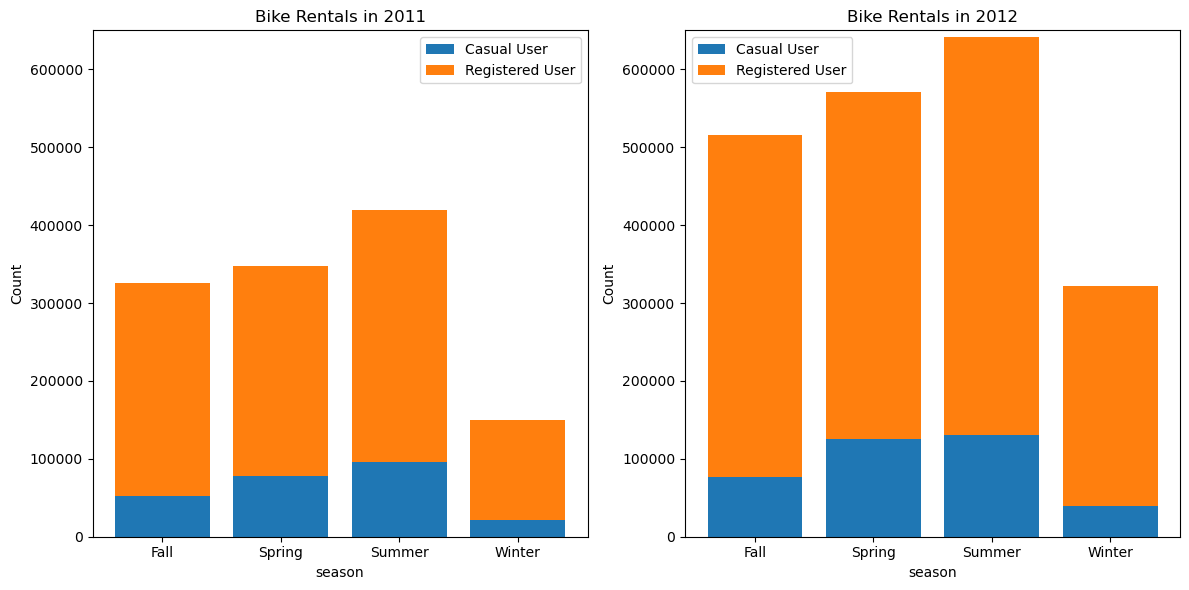

In [172]:
# plot the number of bike rentals in each season in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'season', 650000)

#### Conclusion 1: Hypothesis 1 is true, the number of bike rentals is higher during the summer season

## Hypothesis 2

#### If the value of the the weather column is equal to clean, then the number of bike rentals will be higher than the other seasons


In [173]:
# Create a pivot table to check the number of bike rentals in each weather column value in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='weather', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='weather', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)

year,2011,2012
weather,,
Clear,875053,1463120
Mist-Cloudy,300519,495433
Light-Rain,67495,90836
Heavy-Rain,36,187


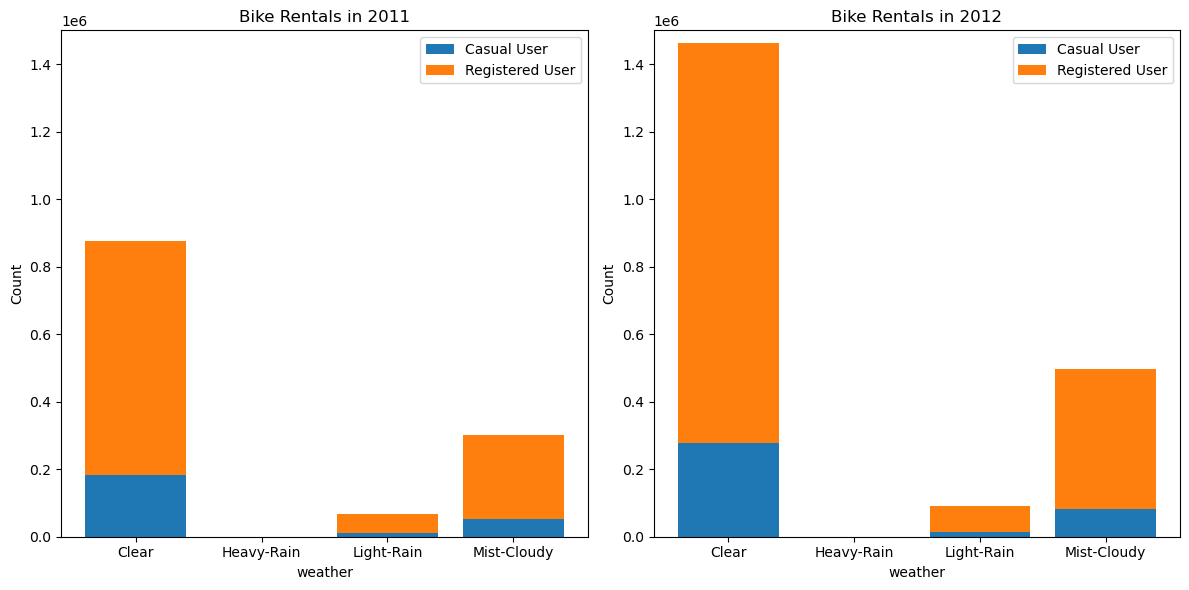

In [174]:
# plot the number of bike rentals in each weather in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'weather', 1500000)

#### Conclusion 1: Hypothesis 2 is true, the number of bike rentals is higher when the weather is clear

## Hypothesis 3

#### If the value of the the temperature column is equal to hot, then the number of bike rentals will be higher than the other seasons


In [175]:
# Create two pivot tables to check the number of bike rentals in each warmness column value in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='warmness', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='warmness', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)

year,2011,2012
warmness,,
Hot,463595,760905
Cold,305533,526595
Warm,262185,425526
Very Hot,211790,336550


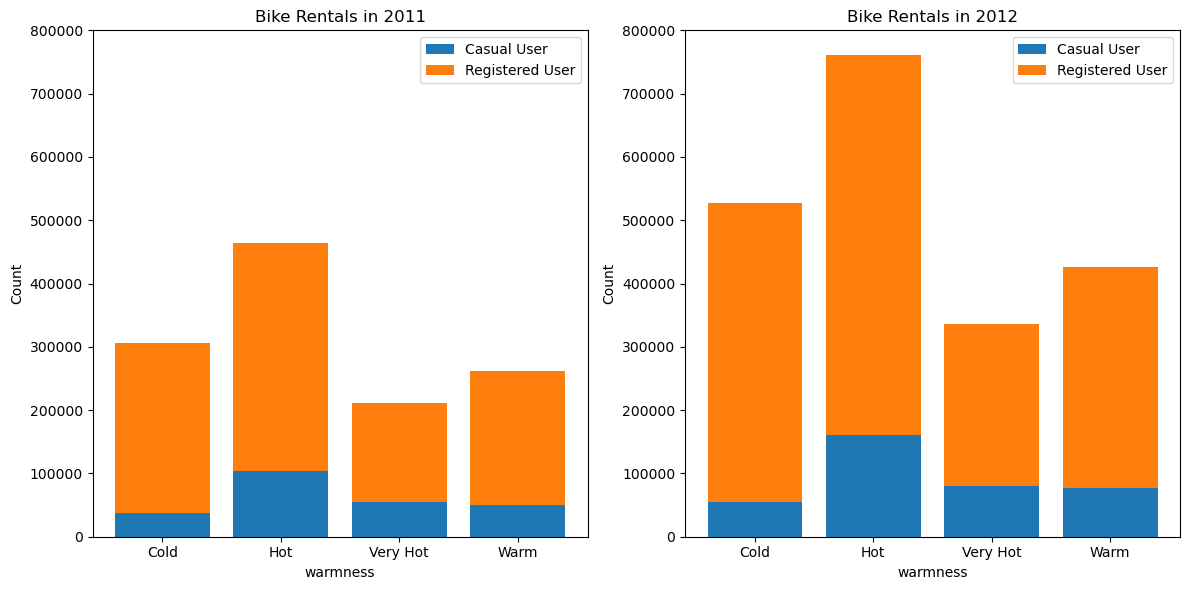

In [176]:
# plot the number of bike rentals in each warmness in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'warmness', 800000)

#### Conclusion 1: Hypothesis 3 is true, the number of bike rentals is higher when the temperature is hot. Surprisingly cold weather is in the position number 2. 

## Hypothesis 4

#### If the value of the the working day column is equal to yes, then the number of bike rentals by registered members will be higher than the non registered members and vice versa

In [177]:
# Create two pivot tables to check the number of bike rentals in each workingday column value in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='workingday', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='workingday', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)



year,2011,2012
workingday,,
Yes,856264,1436146
No,386839,613430


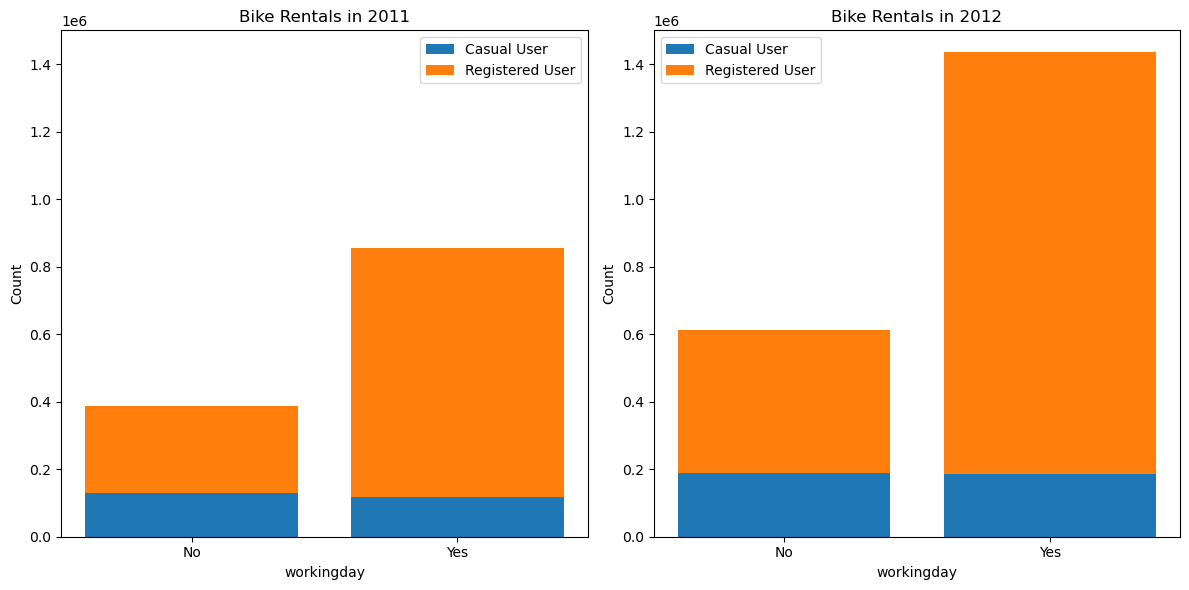

In [178]:
# plot the number of bike rentals in each workingday value in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'workingday', 1500000)

#### Conclusion 1: Hypothesis 4 is true, registered customers rent more bikes than casual customers either in working days or not. Also casual users rent more bikes during weekdays

## Hypothesis 5

### If the value of the the day period column is equal to night, then the number of bike rentals will be higher than the other periods

In [179]:
# Create two pivot tables to check the number of bike rentals in each day_period column value in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='day_period', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='day_period', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)

year,2011,2012
day_period,,
Afternoon,534650,883450
Morning,385190,651411
Night,260288,416049
Dawn,62975,98666


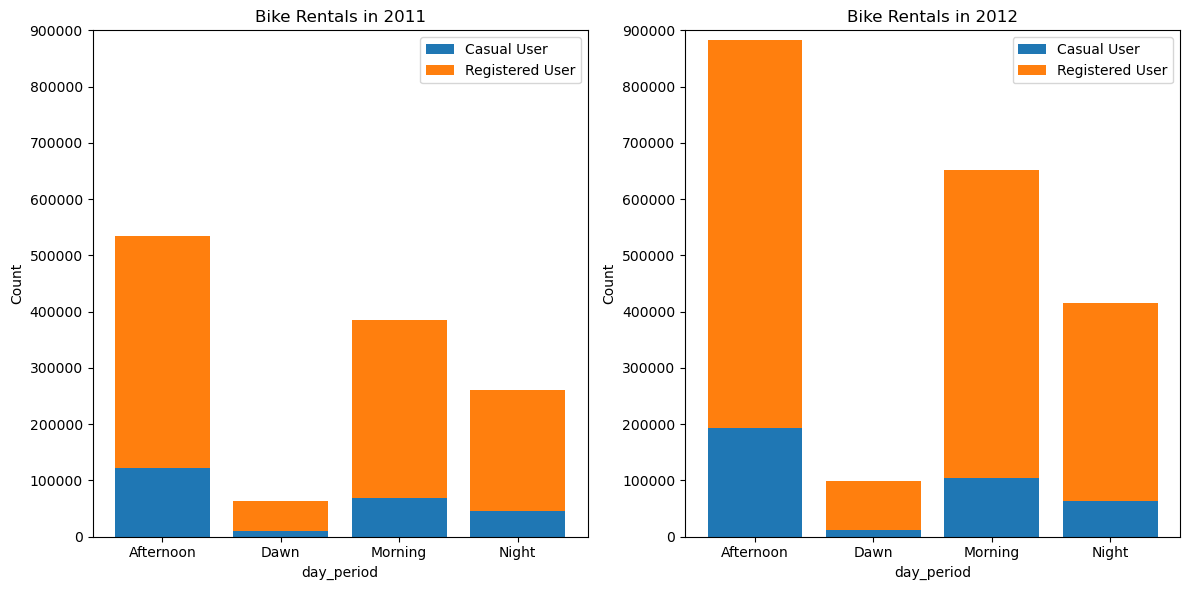

In [180]:
# plot the number of bike rentals in each day_period value in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'day_period', 900000)

#### Conclusion 1: Hypothesis 5 is false, the number of bike rentals is higher in the afternoon

## Hypothesis 6

#### If the value of the the weekday column is equal to monday, tuesday, wednesday, thursday and/or friday, then the number of bike rentals will be higher than the other days

In [181]:
# Create two pivot tables to check the number of bike rentals in each weekday column value in 2011 and 2012 and order it in descending order
rentals_time_weather.pivot_table(index='weekday', columns='year', values='count', aggfunc='sum').sort_values(by=2012, ascending=False)
rentals_time_weather.pivot_table(index='weekday', columns='year', values='count', aggfunc='sum').sort_values(by=2011, ascending=False)

year,2011,2012
weekday,,
Saturday,182006,305784
Wednesday,180338,288771
Tuesday,180221,275282
Sunday,179743,298064
Monday,177074,266953
Friday,174552,310843
Thursday,169169,303879


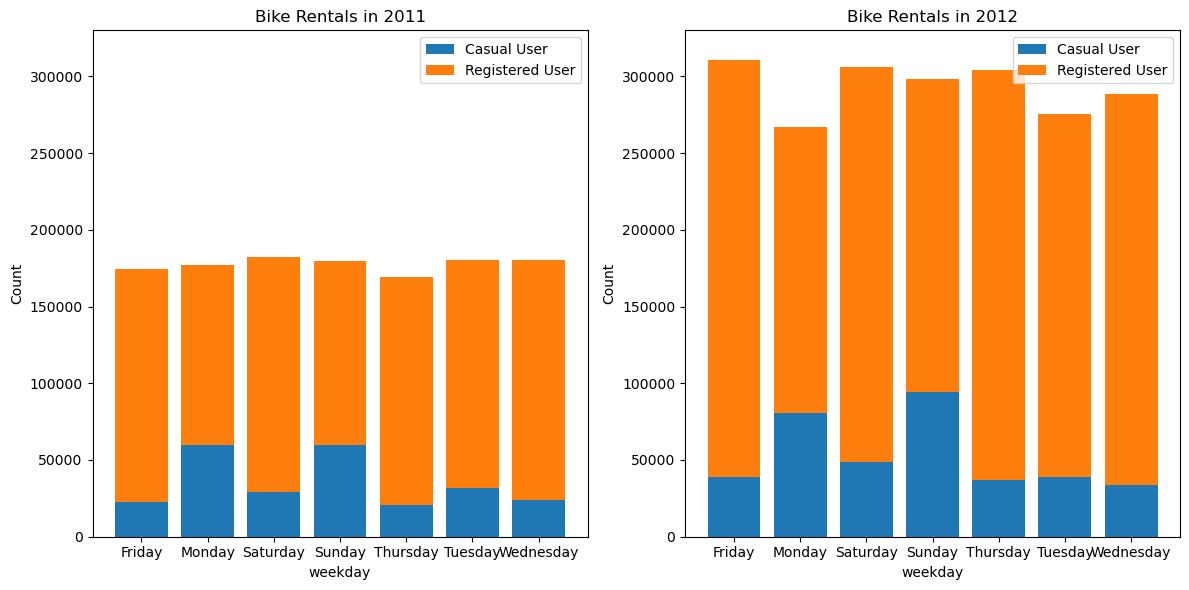

In [182]:
# Plot the number of bike rentals in each hour value in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'weekday', 330000)

#### Conclusion 1: Hypothesis 6 is not true, the number of bike rentals do not show a relevant variance in therms of total rentals per day in 2011 and 2012  

## Hypothesis 7

#### Hypothesis 7: if the value of the the month column is equal to june, july and/or august, then the number of bike rentals will be higher than the other months

In [183]:
# Create two pivot tables to check the number of bike rentals in each month column value in 2011 and 2012
rentals_time_weather.pivot_table(index='month', columns='year', values='count', aggfunc='sum').sort_values(by=2012)
rentals_time_weather.pivot_table(index='month', columns='year', values='count', aggfunc='sum').sort_values(by=2011)

year,2011,2012
month,,
January,38189,96744
February,48215,103137
March,64045,164875
December,87323,123713
April,94870,174224
November,102167,152664
October,123511,198841
September,127418,218573
May,135821,195865


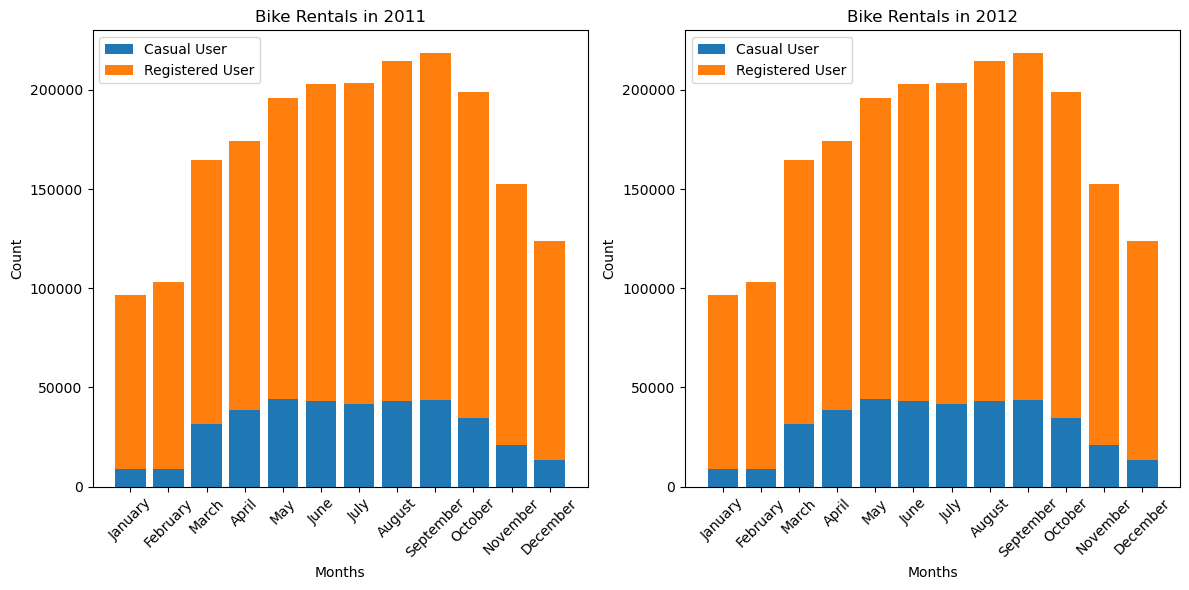

In [184]:
# Group the data by season and calculate the total counts for casual and registered users
rentals_2011_months = rentals_2011.groupby('month')[['casual_user', 'registered_user']].sum()
rentals_2012_months = rentals_2012.groupby('month')[['casual_user', 'registered_user']].sum()

# order the index of the rentals_2011_months and rentals_2012_months df from january to december 
rentals_2011_months = rentals_2011_months.reindex(index=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December'])
rentals_2012_months = rentals_2012_months.reindex(index=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December'])

# Determine the maximum count value across both years for setting the same y-axis limit in the plots below
max_count = 230000

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 2011
ax1.bar(rentals_2012_months.index, rentals_2012_months['casual_user'], label='Casual User')
ax1.bar(rentals_2012_months.index, rentals_2012_months['registered_user'], bottom=rentals_2012_months['casual_user'], label='Registered User')
ax1.set_xlabel('Months')
ax1.set_ylabel('Count')
ax1.set_title('Bike Rentals in 2011')
ax1.legend()
ax1.set_ylim(0, max_count)  # Set the y-axis limit

# Plot for 2012
ax2.bar(rentals_2012_months.index, rentals_2012_months['casual_user'], label='Casual User')
ax2.bar(rentals_2012_months.index, rentals_2012_months['registered_user'], bottom=rentals_2012_months['casual_user'], label='Registered User')
ax2.set_xlabel('Months')
ax2.set_ylabel('Count')
ax2.set_title('Bike Rentals in 2012')
ax2.legend()
ax2.set_ylim(0, max_count)  # Set the y-axis limit

# rotate the x-axis labels in the plots
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

#### Conclusion 1: Hypothesis 7 is not true. Despite that the number of bike rentals in june, july and augst are in the top 4 of the rental records, the month with the highest number of bike rentals in 2011 and 2012 is september.

#### Conclusion 2: It is possible that the rentals are higher in september because this month is not so warm as June, July and August. 

## Hypothesis 8

#### If the value of the the hour column is equal to 8, 17 and/or 18, then the number of bike rentals will be higher than the other hours

In [185]:
# Create two pivot tables to check the number of bike rentals in each hour column value in 2011 and 2012
rentals_time_weather.pivot_table(index='hour', columns='year', values='count', aggfunc='sum').sort_values(by=2011)
rentals_time_weather.pivot_table(index='hour', columns='year', values='count', aggfunc='sum').sort_values(by=2012)

year,2011,2012
hour,,
4,1817,2611
3,3441,4733
5,5157,9104
2,6661,9691
1,9558,14606
0,15540,23590
6,20801,34331
23,25116,38825
22,37677,57935


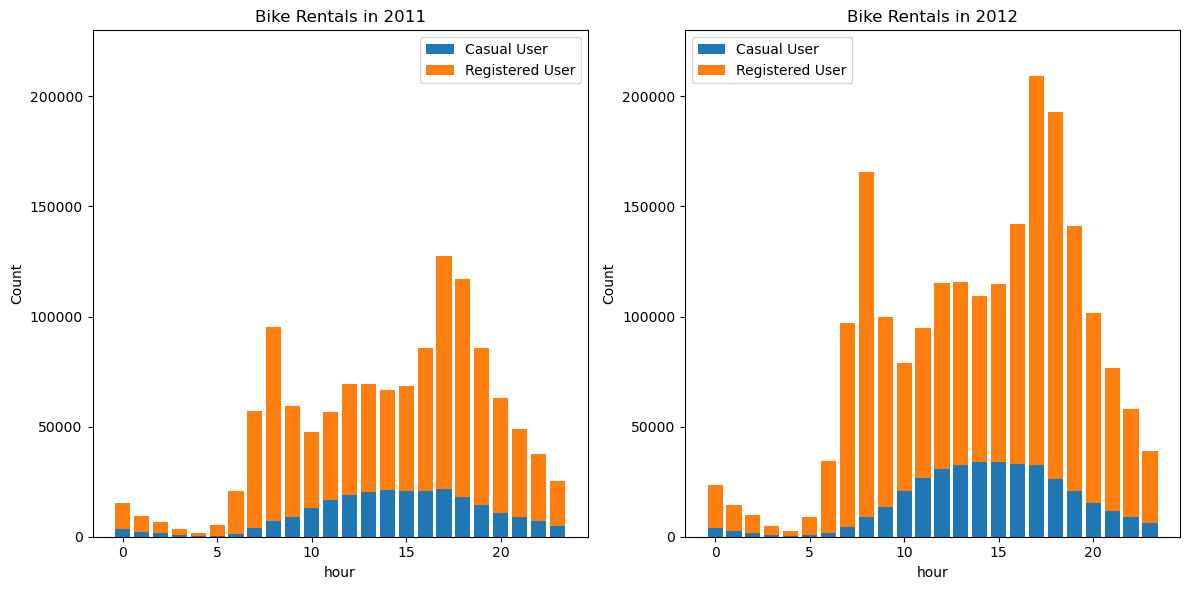

In [186]:
# plot the number of bike rentals in each hour value in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'hour', 230000)

#### Conclusion 1: Hypothesis 8 is partially true, the number of bike rentals is higher in the hour 8:00, 17:00 and 18:00. THIS APPLY ONLY TO REGISTERED USERS.

#### Conclusion 2: Considering the number of bike rentals by casual users, the hours with most rentals are 14:00, 15:00, 16:00 and 17:00.

### Hourly use of the bike rental system by month and casual and registered users in 2011 and 2012


### Hourly analysis by Month -- 2011

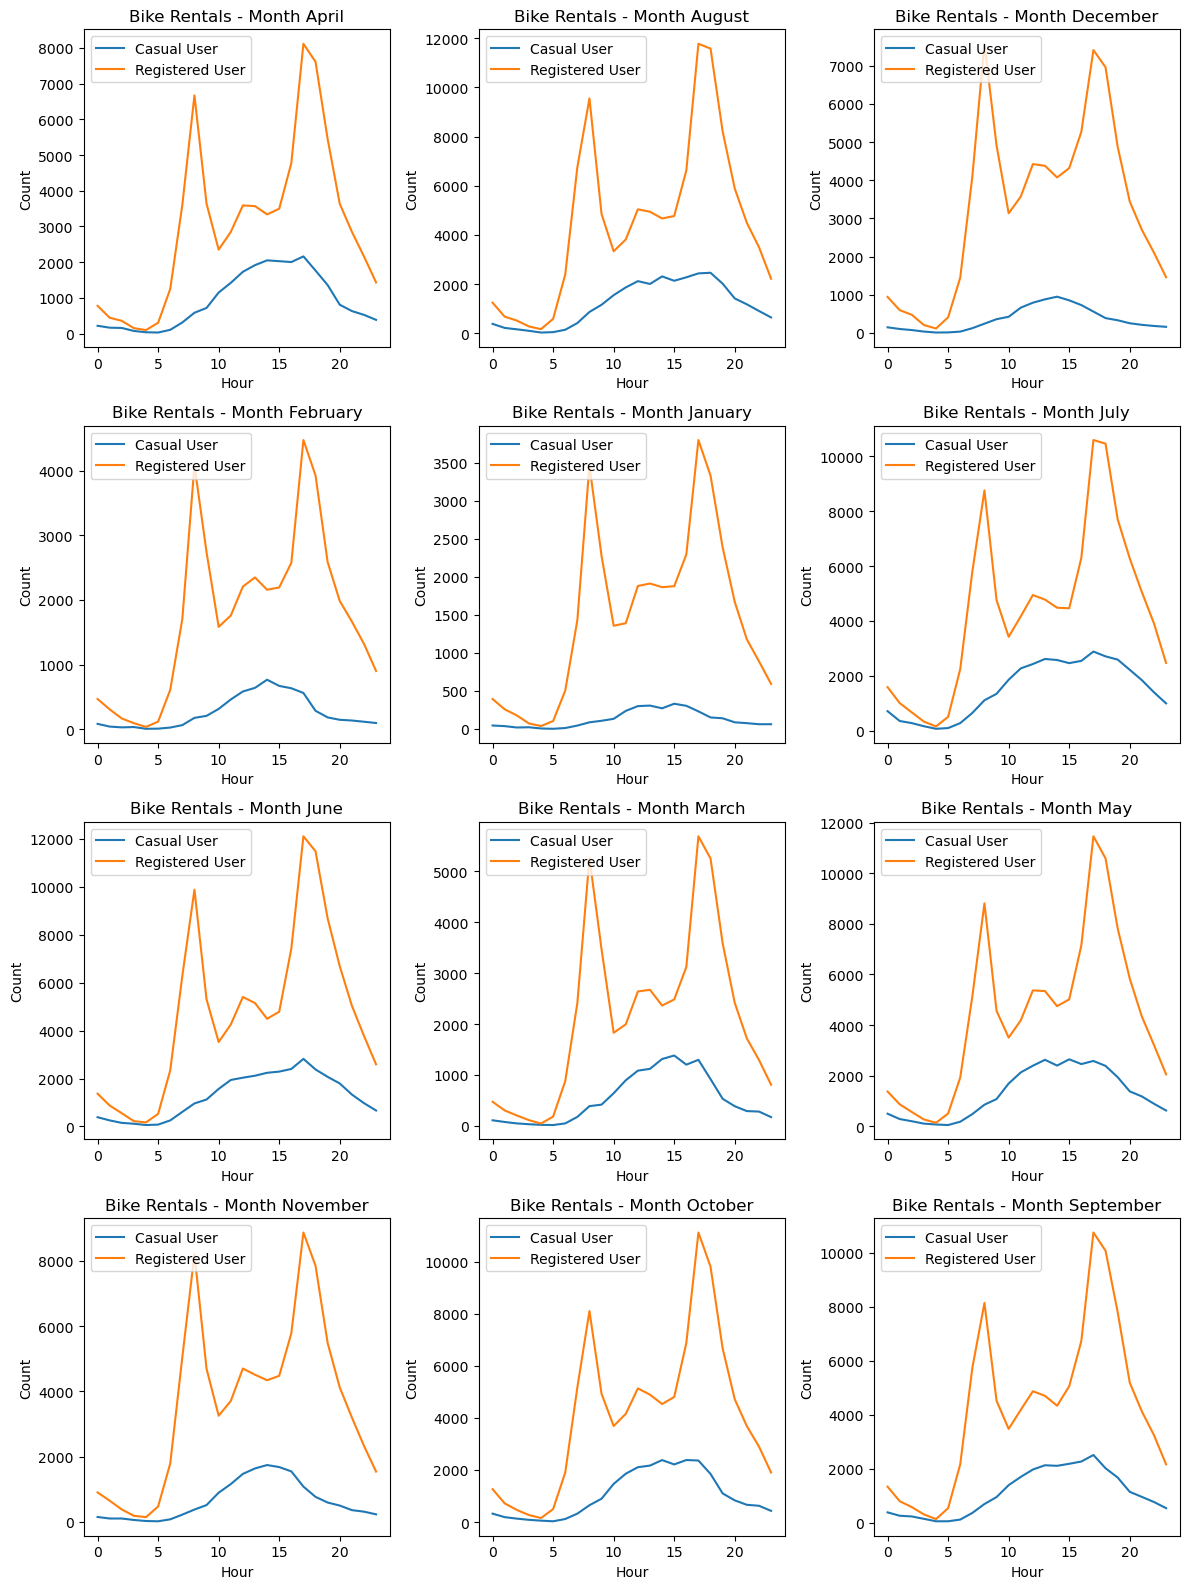

In [187]:
import matplotlib.pyplot as plt

# Group the data by month, hour, casual_user, and registered_user and calculate the total counts
rentals_2011_hours = rentals_time_weather[rentals_time_weather['year'] == 2011].groupby(['month', 'hour'])[['casual_user', 'registered_user']].sum()
rentals_2012_hours = rentals_time_weather[rentals_time_weather['year'] == 2012].groupby(['month', 'hour'])[['casual_user', 'registered_user']].sum()

# Create a list of unique months in the 2011 data
months = rentals_2011_hours.index.get_level_values('month').unique()

# Determine the grid size based on the number of months
num_months = len(months)
grid_size = (num_months // 3, 3) if num_months % 3 == 0 else (num_months // 3 + 1, 3)

# Create a figure with subplots
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 4 * grid_size[0]))

# Iterate over the months and plot the hourly counts in separate subplots
for i, month in enumerate(months):
    ax = axes[i // 3, i % 3] if num_months > 1 else axes
    rentals_month = rentals_2011_hours.loc[month]

    ax.plot(rentals_month.index.get_level_values('hour'), rentals_month['casual_user'], label='Casual User')
    ax.plot(rentals_month.index.get_level_values('hour'), rentals_month['registered_user'], label='Registered User')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Count')
    ax.set_title(f'Bike Rentals - Month {month}')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


### Hourly analysis by Month -- 2012

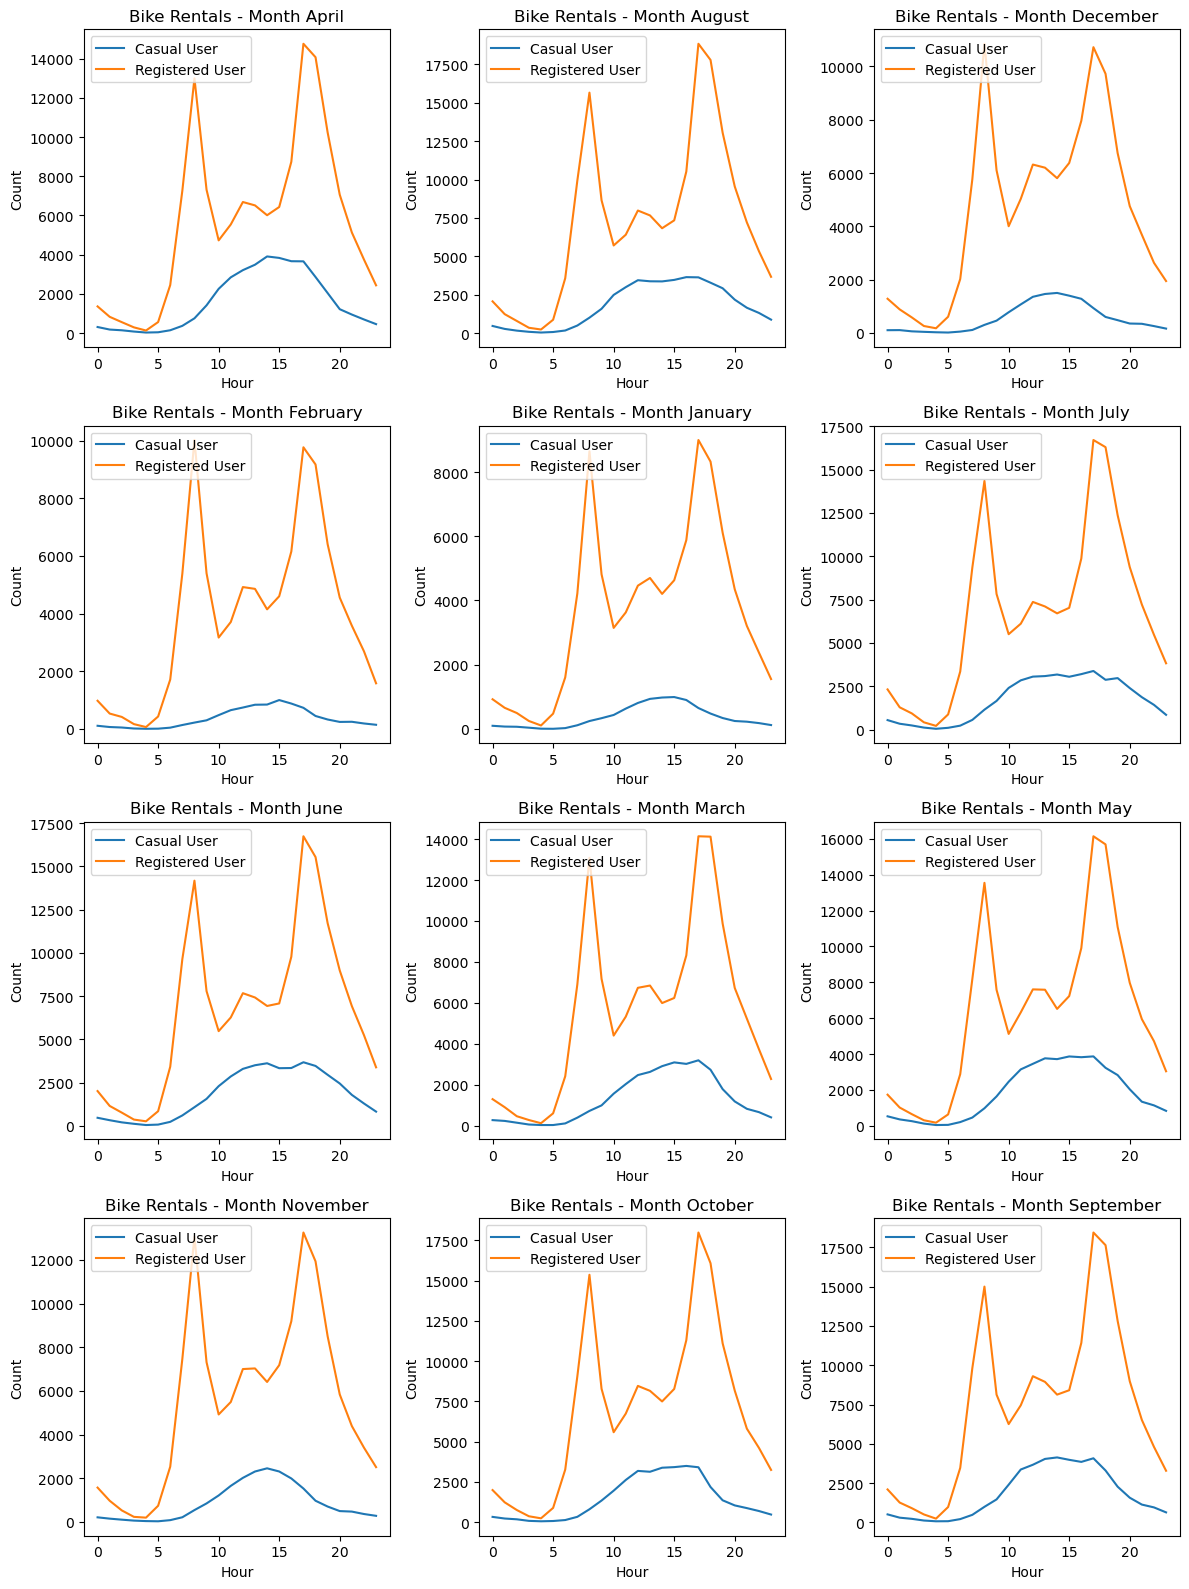

In [188]:
# Create a list of unique months in the 2011 data
months = rentals_2012_hours.index.get_level_values('month').unique()

# Determine the grid size based on the number of months
num_months = len(months)
grid_size = (num_months // 3, 3) if num_months % 3 == 0 else (num_months // 3 + 1, 3)

# Create a figure with subplots
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 4 * grid_size[0]))

# Iterate over the months and plot the hourly counts in separate subplots
for i, month in enumerate(months):
    ax = axes[i // 3, i % 3] if num_months > 1 else axes
    rentals_month = rentals_2012_hours.loc[month]

    ax.plot(rentals_month.index.get_level_values('hour'), rentals_month['casual_user'], label='Casual User')
    ax.plot(rentals_month.index.get_level_values('hour'), rentals_month['registered_user'], label='Registered User')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Count')
    ax.set_title(f'Bike Rentals - Month {month}')
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

## Hypothesis 9

#### If the value of the holiday column is equal to yes, then the number of bike rentals will be higher than when its not holiday time

In [189]:
# Create two pivot tables to check the number of bike rentals in each holiday column value in 2011 and 2012 and sort the values
rentals_time_weather.pivot_table(index='holiday', columns='year', values='count', aggfunc='sum').sort_values(ascending=False, by=2011)
rentals_time_weather.pivot_table(index='holiday', columns='year', values='count', aggfunc='sum').sort_values(ascending=False, by=2012)

year,2011,2012
holiday,,
No,1213081,2001163
Yes,30022,48413


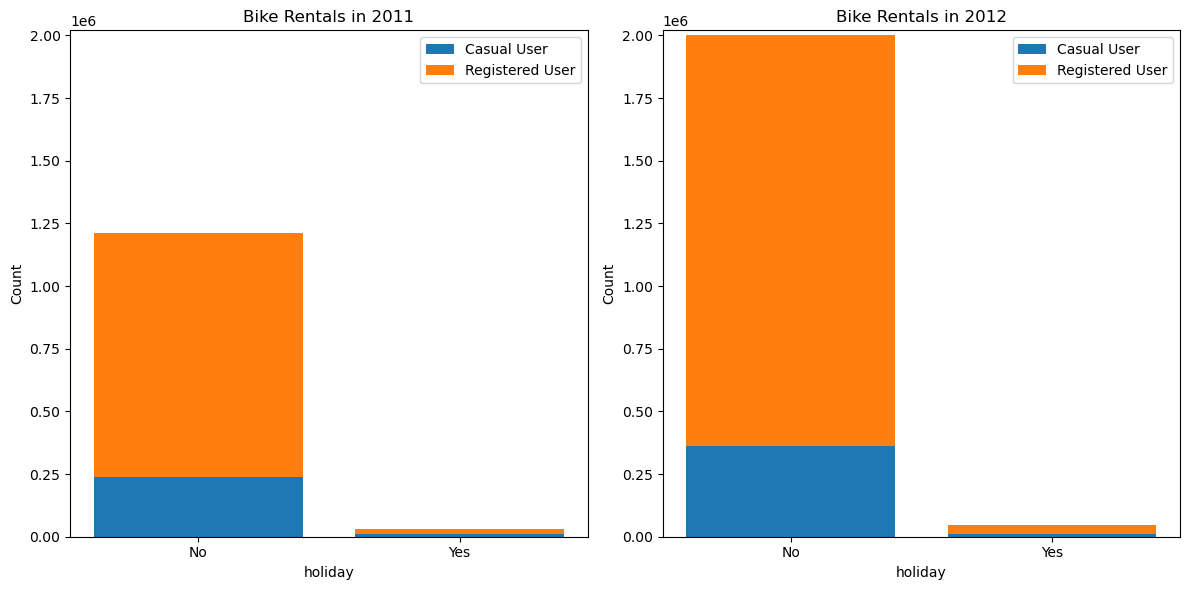

In [190]:
# plot the number of bike rentals in each holiday value in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'holiday', 2020000)

#### Conclusion 1: Hypothesis 9 is false, because the number of bike rentals is higher in the non-holiday days

## Hypothesis 10

#### If the values of the year column is equal to 2011, then the number of bike rentals will be higher than in 2012

In [191]:
# create a new df for rental_per_year df to check the number of bike rentals in each year using groupby function
rentals_per_year_df = rentals_time_weather.groupby('year').sum().sort_values(by='count', ascending=False)

# drop the instant, hour, temp, apparent_temp, humidity, windspeed, and holiday columns
rentals_per_year_df.drop(['instant', 'hour', 'temp', 'apparent_temp', 'humidity', 'windspeed'], axis=1, inplace=True)

# show the df
rentals_per_year_df

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_83446/4263576487.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rentals_per_year_df = rentals_time_weather.groupby('year').sum().sort_values(by='count', ascending=False)


,casual_user,registered_user,count
year,,,
2012,372765,1676811,2049576
2011,247252,995851,1243103


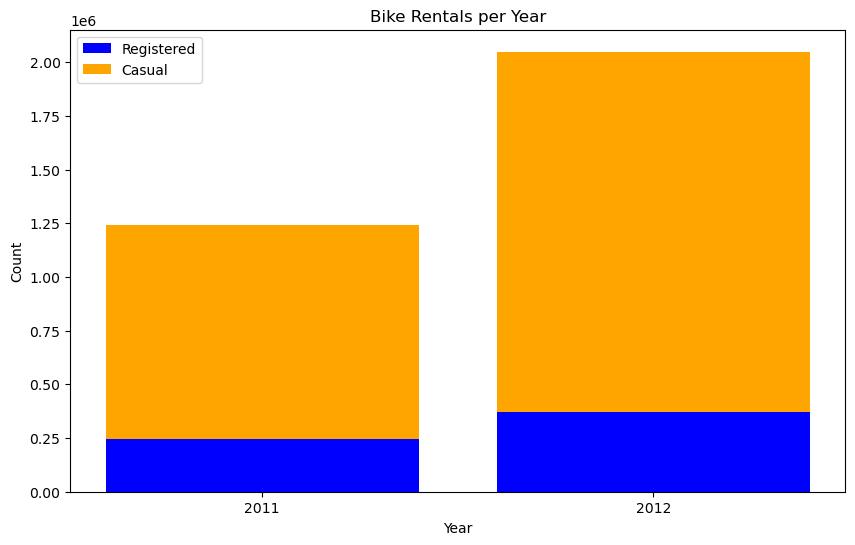

In [192]:
# plot the number of bike rentals in each year
plt.figure(figsize=(10, 6))
plt.bar(rentals_per_year_df.index, rentals_per_year_df['casual_user'], color='blue', label='Registered')
plt.bar(rentals_per_year_df.index, rentals_per_year_df['registered_user'], color='orange', label='Casual', bottom=rentals_per_year_df['casual_user'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Bike Rentals per Year')
plt.legend()

# Set x-axis tick labels
plt.xticks(rentals_per_year_df.index, rentals_per_year_df.index)

plt.show()

#### Conclusion 1: Hypothesis 10 is not true, the number of bike rentals is higher in 2012

## Hypothesis 11 

#### If the values of the windspeed_level column is equal to strong, then the number of bike rentals will be lower than the  when the windspeed is low 

In [193]:
# Create two pivot tables to check the number of bike rentals in each windspeed_level column value in 2011 and 2012 and sort the values
rentals_time_weather.pivot_table(index='windspeed_level', columns='year', values='count', aggfunc='sum').sort_values(ascending=False, by=2011)
rentals_time_weather.pivot_table(index='windspeed_level', columns='year', values='count', aggfunc='sum').sort_values(ascending=False, by=2012)

year,2011,2012
windspeed_level,,
Medium,619394,1043225
Low,434990,704261
High,188719,302090


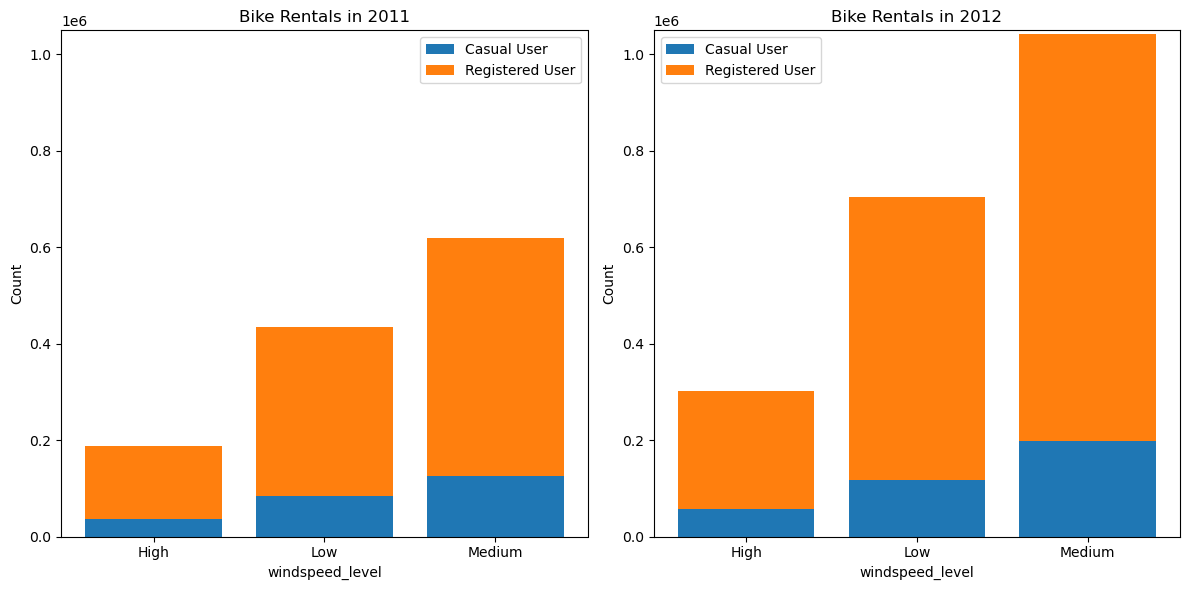

In [194]:
# plot the number of bike rentals in each windspeed_level value in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'windspeed_level', 1050000)

#### Hypothesis 11 is not true, since the number of bike rentals is higher when the windspeed is medium

## Hypothesis 12

#### If the values of the humidity_level column is equal to high, then the number of bike rentals will be lower than the  when the humidity is low


In [195]:
# create a pivot table to check the number of bike rentals in each humidity level column value in 2011 and 2012 and sort the values
rentals_time_weather.pivot_table(index='humidity_level', columns='year', values='count', aggfunc='sum').sort_values(ascending=False, by=2011)
rentals_time_weather.pivot_table(index='humidity_level', columns='year', values='count', aggfunc='sum').sort_values(ascending=False, by=2012)

year,2011,2012
humidity_level,,
Medium,679911,1086431
Low,210547,497761
High,352645,465384


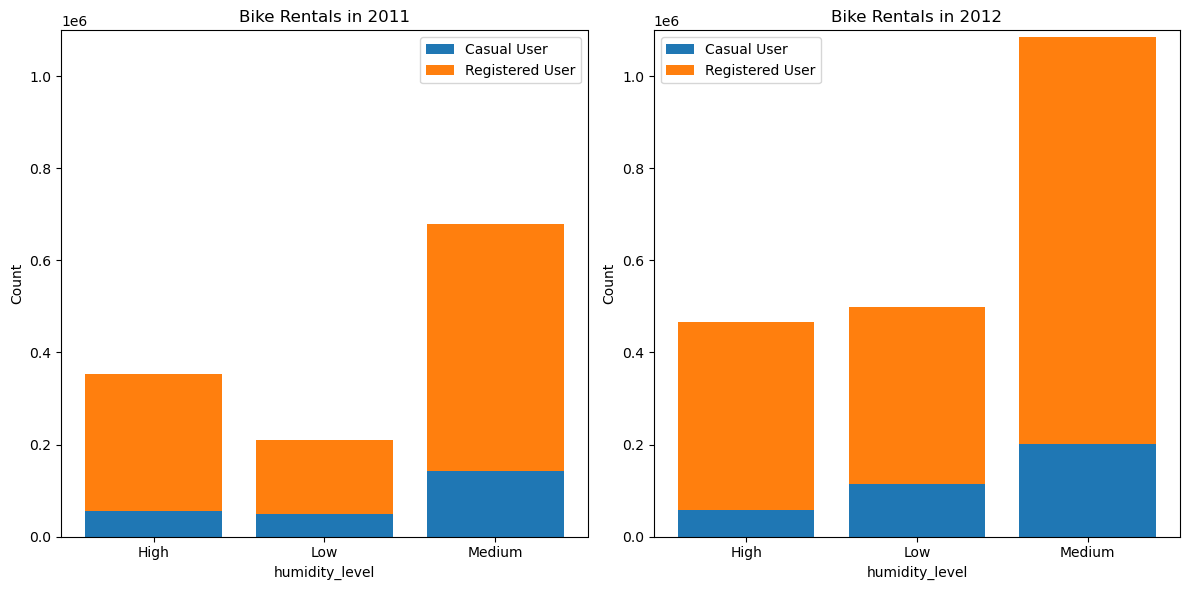

In [196]:
# plot the number of bike rentals in each humidity level column value in 2011 and 2012
analyze_variable(rentals_2011, rentals_2012, 'humidity_level', 1100000)

#### Hypothesis 12 is not true, the number of bike rentals is higher when the humidity is medium

# Gepgraphical analysis

## Start_station_long_lat dataset 

In [197]:
# import start_stations_long_lat.csv
start_stations_long_lat = pd.read_csv('../datasets/start_stations_long_lat.csv', sep=';')

# print first 5 rows
print(start_stations_long_lat.head(10))

                   Start station  counts  Start station latitude  \
0                 10th & E St NW    6280               38.896136   
1            10th & Monroe St NE    5423               38.932514   
2                 10th & U St NW   38149               38.917007   
3  10th St & Constitution Ave NW   33682               38.891931   
4                 11th & F St NW      38               38.897206   
5                 11th & H St NE   11075               46.367125   
6            11th & Kenyon St NW   31741               38.930502   
7                 11th & M St NW       1               38.905107   
8            12th & Army Navy Dr    5090               38.865176   
9                 12th & L St NW    8390               38.903819   

   Start station longitude  
0               -77.022843  
1               -76.992889  
2               -77.024112  
3               -77.025990  
4               -77.022971  
5               -94.179663  
6               -77.018670  
7               -77

 ### Top10 Start Stations

In [198]:
top_start_stations = start_stations_long_lat.sort_values(by='counts', ascending=False)
print(top_start_stations.head(10))
top10_start_stations = top_start_stations.head(10)

                                         Start station  counts  \
153               Massachusetts Ave & Dupont Circle NW  107162   
109                    Columbus Circle / Union Station   77750   
27                                      15th & P St NW   73707   
30                               17th & Corcoran St NW   63502   
86                         Adams Mill & Columbia Rd NW   62378   
20                                      14th & V St NW   58356   
119  Eastern Market Metro / Pennsylvania Ave & 7th ...   56029   
162                        New Hampshire Ave & T St NW   55812   
19                          14th & Rhode Island Ave NW   50142   
51                            20th St & Florida Ave NW   49812   

     Start station latitude  Start station longitude  
153               38.910100               -77.044400  
109               38.897027               -77.004915  
27                38.909627               -77.044409  
30                38.912083               -77.038646 

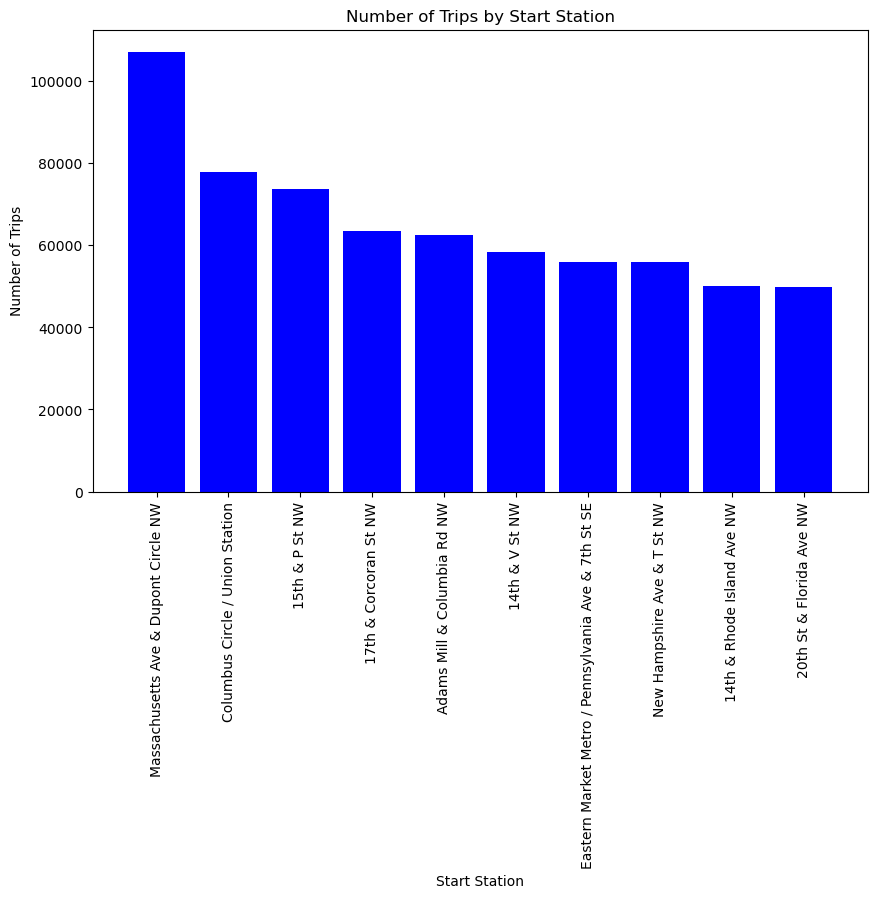

In [199]:
# create a bar plot to show the number of trips by start station for the top10_start_stations df in descending order
plt.figure(figsize=(10, 6))
plt.bar(top10_start_stations['Start station'], top10_start_stations['counts'], color='blue')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Start Station')
plt.xticks(rotation=90)

plt.show()

## Visualization of all the start stations on a Heatmap

In [200]:
# Create a heatmap layer using the start station coordinates and counts
heat_data = start_stations_long_lat[['Start station latitude', 'Start station longitude', 'counts']].values.tolist()
start_station_map = folium.Map(location=[38.9072, -77.0369], zoom_start=12)
HeatMap(heat_data).add_to(start_station_map)

# Add markers to the map with the count number of each start station
for lat, lng, label, count in zip(start_stations_long_lat['Start station latitude'], start_stations_long_lat['Start station longitude'], start_stations_long_lat['Start station'], start_stations_long_lat['counts']):
    if isinstance(lat, float) and isinstance(lng, float):
        folium.Marker(
            [lat, lng],
            popup=label,
            icon=folium.Icon(color='blue', icon='bicycle', prefix='fa', icon_size=(1,1)),
            tooltip=f"{count} trips"
        ).add_to(start_station_map)

# Display the map
start_station_map

## End_stations_long_lat dataset

In [201]:
# import end_stations_long_lat.csv
end_stations_long_lat = pd.read_csv('../datasets/end_stations_long_lat.csv')

# print first 5 rows
display(end_stations_long_lat.head())

,End station,Count,End station latitude,End station longitude
0,Massachusetts Ave & Dupont Circle NW,118707,38.910100,-77.044400
1,15th & P St NW,83457,38.909627,-77.044409
2,Columbus Circle / Union Station,79681,38.897027,-77.004915
3,17th & Corcoran St NW,67382,38.912083,-77.038646
4,14th & V St NW,59658,38.918116,-77.035802


 ### Top10 End Stations

In [202]:
top_end_stations = end_stations_long_lat.sort_values(by='Count', ascending=False)
# get a table with the top 10 start stations
top_end_stations = end_stations_long_lat.sort_values(by='Count', ascending=False)
top10_end_stations = top_end_stations.head(10)
print(top10_end_stations)

                                         End station   Count  \
0               Massachusetts Ave & Dupont Circle NW  118707   
1                                     15th & P St NW   83457   
2                    Columbus Circle / Union Station   79681   
3                              17th & Corcoran St NW   67382   
4                                     14th & V St NW   59658   
5                        New Hampshire Ave & T St NW   57145   
6                                      8th & H St NW   54811   
7                                     21st & I St NW   54259   
8  Eastern Market Metro / Pennsylvania Ave & 7th ...   54070   
9                        Adams Mill & Columbia Rd NW   52546   

   End station latitude  End station longitude  
0             38.910100             -77.044400  
1             38.909627             -77.044409  
2             38.897027             -77.004915  
3             38.912083             -77.038646  
4             38.918116             -77.035802  
5

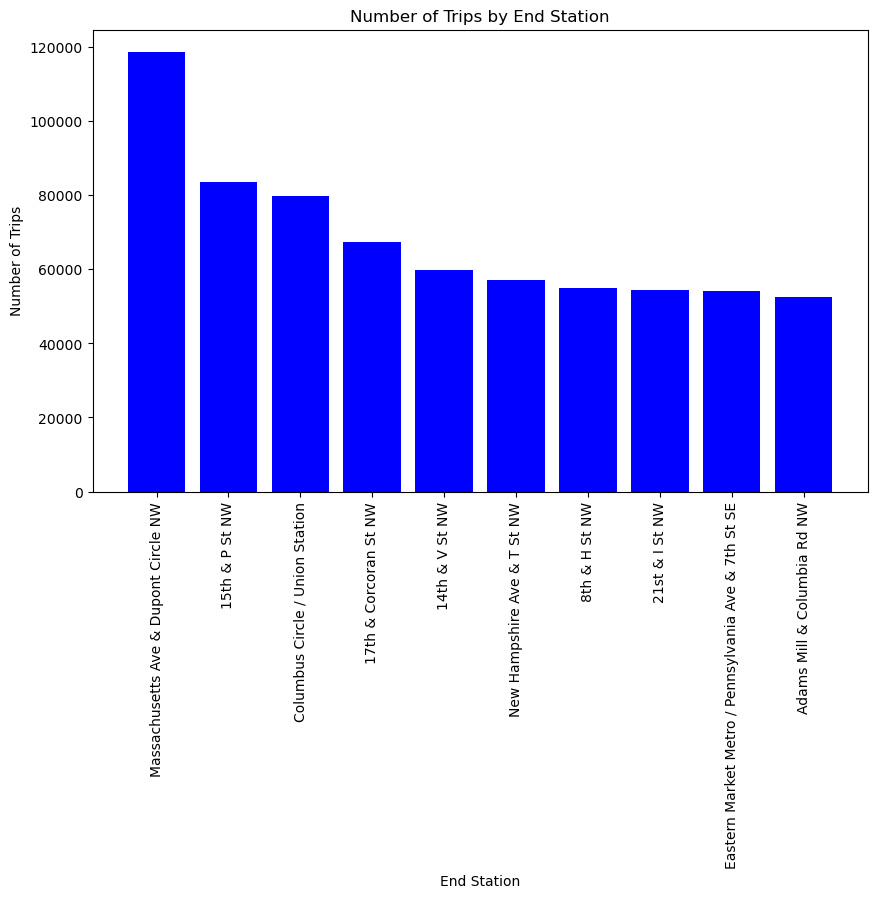

In [203]:
# create a bar plot to show the number of trips by start station for the top10_end_stations df in descending order
plt.figure(figsize=(10, 6))
plt.bar(top10_end_stations['End station'], top10_end_stations['Count'], color='blue')
plt.xlabel('End Station')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by End Station')
plt.xticks(rotation=90)

plt.show()

In [204]:
# Create a heatmap layer using the end station coordinates and counts
heat_data = end_stations_long_lat[['End station latitude', 'End station longitude', 'Count']].values.tolist()
end_station_map = folium.Map(location=[38.9072, -77.0369], zoom_start=12)
HeatMap(heat_data).add_to(end_station_map)

# Add markers to the map with the count number of each end station
for lat, lng, label, count in zip(end_stations_long_lat['End station latitude'], end_stations_long_lat['End station longitude'], end_stations_long_lat['End station'], end_stations_long_lat['Count']):
    if isinstance(lat, float) and isinstance(lng, float):
        folium.Marker(
            [lat, lng],
            popup=label,
            icon=folium.Icon(color='blue', icon='bicycle', prefix='fa', icon_size=(1,1)),
            tooltip=f"{count} trips"
        ).add_to(end_station_map)

# Display the map
end_station_map

# Rentals_end_start_station dataset

In [205]:
# import rentals_end_start_stations.csv
rentals_end_start_stations = pd.read_csv('../datasets/rentals_end_start_stations.csv')

# print first 5 rows
display(rentals_end_start_stations.head())

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


## Top 10 trips between start and end stations

In [206]:
# Group by start and end stations and count the occurrences
trip_counts = rentals_end_start_stations.groupby(['Start station', 'End station']).size().reset_index(name='Count')
trip_counts = trip_counts.sort_values(by='Count', ascending=False)
display(trip_counts.head(10))
display(trip_counts.shape)


,Start station,End station,Count
14910,Eastern Market Metro / Pennsylvania Ave & 7th ...,Lincoln Park / 13th & East Capitol St NE,10205
11690,Adams Mill & Columbia Rd NW,Calvert & Biltmore St NW,9278
17691,Lincoln Park / 13th & East Capitol St NE,Eastern Market Metro / Pennsylvania Ave & 7th ...,8770
12914,Calvert & Biltmore St NW,Adams Mill & Columbia Rd NW,8722
18435,Massachusetts Ave & Dupont Circle NW,15th & P St NW,6713
19409,New Hampshire Ave & T St NW,Massachusetts Ave & Dupont Circle NW,6386
3539,15th & P St NW,Massachusetts Ave & Dupont Circle NW,6044
1266,13th & D St NE,Columbus Circle / Union Station,5801
18548,Massachusetts Ave & Dupont Circle NW,New Hampshire Ave & T St NW,5452
13715,Columbus Circle / Union Station,13th & D St NE,5359


(22799, 3)

In [207]:
top_trip_counts = trip_counts.head(10)

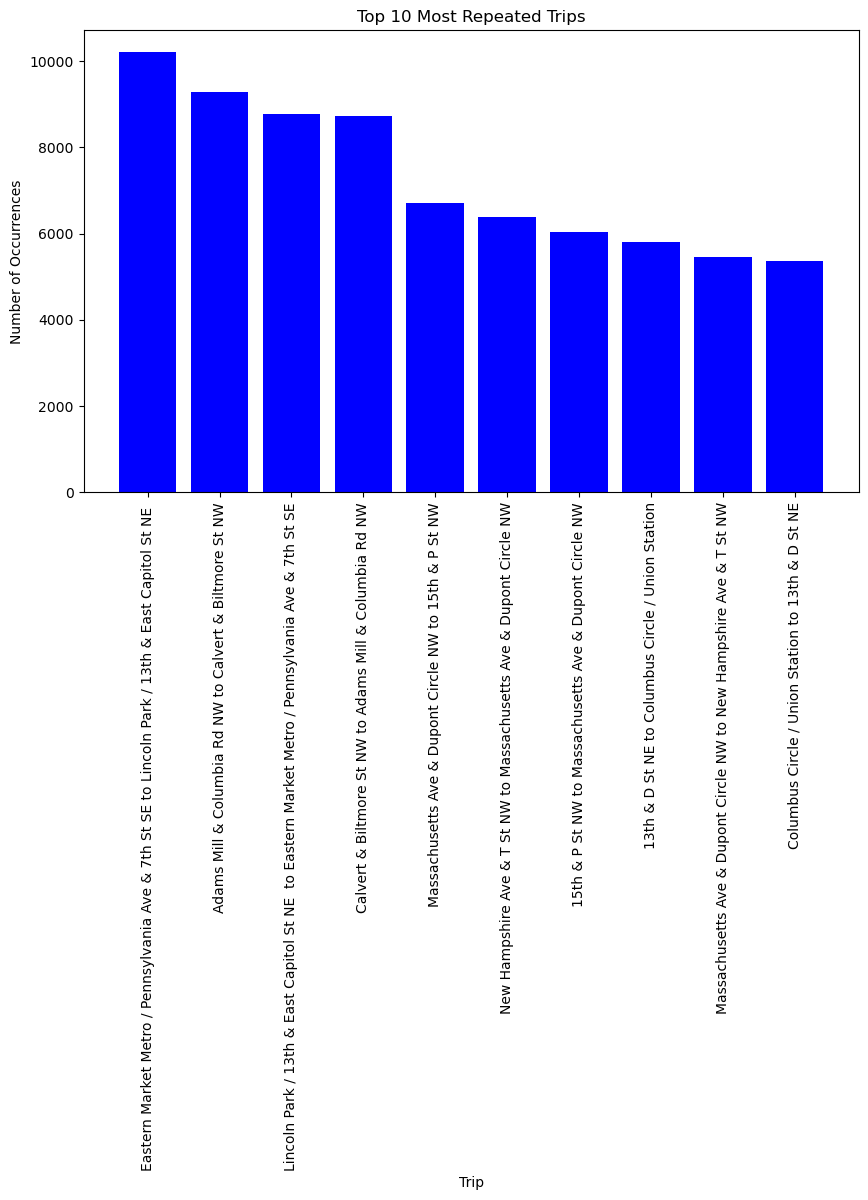

In [208]:
# create a bar plot to show each top_trip_counts df in descending order
plt.figure(figsize=(10, 6))
plt.bar(top_trip_counts['Start station'] + ' to ' + top_trip_counts['End station'], top_trip_counts['Count'], color='blue')
plt.xlabel('Trip')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Repeated Trips')
plt.xticks(rotation=90)
plt.show()

# Top 10 trips in a map (separately)

In [209]:
# import top_trip_counts.csv
top_10_trips = pd.read_csv('../datasets/top_10_trips.csv')

# print first 5 rows
display(top_10_trips.head(10))

,Start station,End station,Count,Start station latitude,Start station longitude,End station latitude,End station longitude
0,Eastern Market Metro / Pennsylvania Ave & 7th ...,Lincoln Park / 13th & East Capitol St NE,10205,38.884056,-76.995262,38.917007,-77.024112
1,Adams Mill & Columbia Rd NW,Calvert & Biltmore St NW,9278,38.922972,-77.042412,38.892609,-77.042787
2,Lincoln Park / 13th & East Capitol St NE,Eastern Market Metro / Pennsylvania Ave & 7th ...,8770,38.890618,-76.988359,38.884056,-76.995262
3,Calvert & Biltmore St NW,Adams Mill & Columbia Rd NW,8722,38.923211,-77.047639,38.922972,-77.042412
4,Massachusetts Ave & Dupont Circle NW,15th & P St NW,6713,38.910100,-77.044400,38.909627,-77.044409
5,New Hampshire Ave & T St NW,Massachusetts Ave & Dupont Circle NW,6386,38.915540,-77.038180,38.910100,-77.044400
6,15th & P St NW,Massachusetts Ave & Dupont Circle NW,6044,38.909627,-77.044409,38.910100,-77.044400
7,13th & D St NE,Columbus Circle / Union Station,5801,38.894832,-76.987633,38.897027,-77.004915
8,Massachusetts Ave & Dupont Circle NW,New Hampshire Ave & T St NW,5452,38.910100,-77.044400,38.915540,-77.038180
9,Columbus Circle / Union Station,13th & D St NE,5359,38.897027,-77.004915,38.901961,-77.043991


In [210]:
# create a function that can be used to visualize the route between two stations in a map for the top10 trips

def create_route_map(start_point, end_point):
    # Create a map centered on the start point
    map_center = start_point
    zoom_level = 15
    m = folium.Map(location=map_center, zoom_start=zoom_level)

    # Add a marker for the start point
    folium.Marker(start_point, popup='Start Point', icon=folium.Icon(color='green')).add_to(m)

    # Add a marker for the end point
    folium.Marker(end_point, popup='End Point', icon=folium.Icon(color='red')).add_to(m)

    # Make a request to the OSRM API to obtain the route
    url = f'http://router.project-osrm.org/route/v1/driving/{start_point[1]},{start_point[0]};{end_point[1]},{end_point[0]}?overview=full'
    response = requests.get(url)
    route_data = response.json()

    # Extract the route geometry
    route_geometry = polyline.decode(route_data['routes'][0]['geometry'])
    route_points = [(point[0], point[1]) for point in route_geometry]

    # Draw a line along the route path
    line = folium.PolyLine(locations=route_points, color='red', weight=5)
    m.add_child(line)

    return m

### 1st most repeated trip

In [211]:
# create a map for the 1st most repeated trip (Eastern Market Metro / Pennsylvania Ave & 7th St SE to Lincoln Park / 13th & East Capitol St NE)
start_point1 = [38.887777, -77.005833]  # Eastern Market Metro / Pennsylvania Ave & 7th St SE
end_point1 = [38.890222, -76.988432]  # Lincoln Park / 13th & East Capitol St NE

map1 = create_route_map(start_point1, end_point1)
map1.save('route1.html')
map1


### 2nd most repeated trip

In [212]:
# create a map for the 2st most repeated trip (Adams Mill & Columbia Rd NW	Calvert & Biltmore St NW)
start_point2 = [38.922972, -77.042412]  # Adams Mill & Columbia Rd NW
end_point2 = [38.892609, -77.042787]  # Calvert & Biltmore St NW

map2 = create_route_map(start_point2, end_point2)
map2.save('route2.html')
map2


### 3rd most repeated trip

In [213]:
# create a map for the 3st most repeated trip (Lincoln Park / 13th & East Capitol St NE to Eastern Market Metro / Pennsylvania Ave & 7th St SE)
start_point3 = [38.890618, -76.988359]  # Lincoln Park / 13th & East Capitol St NE
end_point3 = [38.884056, -76.995262]  # Eastern Market Metro / Pennsylvania Ave & 7th St SE

map3 = create_route_map(start_point3, end_point3)
map3.save('route3.html')
map3

### 4th most repeated trip

In [214]:
# create a map for the 4st most repeated trip (Calvert & Biltmore St NW	Adams Mill & Columbia Rd NW)
start_point4 = [38.923211, -77.047639]  # Calvert & Biltmore St NW
end_point4 = [38.922972, -77.042412]  # Adams Mill & Columbia Rd NW

map4 = create_route_map(start_point4, end_point4)
map4.save('route4.html')
map4

### 5th most repeated trip

In [215]:
# create a map for the 5st most repeated trip (Massachusetts Ave & Dupont Circle NW	15th & P St NW)
start_point5 = [38.910100, -77.044400]  # Massachusetts Ave & Dupont Circle NW
end_point5 = [38.909627, -77.044409]  # 15th & P St NW

map5 = create_route_map(start_point5, end_point5)
map5.save('route5.html')
map5

### 6th most repeated trip

In [216]:
# create a map for the 6st most repeated trip (New Hampshire Ave & T St NW	Massachusetts Ave & Dupont Circle NW)
start_point6 = [38.915540, -77.038180]  # New Hampshire Ave & T St NW
end_point6 = [38.910100, -77.044400]  # Massachusetts Ave & Dupont Circle NW

map6 = create_route_map(start_point6, end_point6)
map6.save('route6.html')
map6

### 7th most repeated trip

In [217]:
# create a map for the 7st most repeated trip (15th & P St NW	Massachusetts Ave & Dupont Circle NW)	
start_point7 = [38.909627, -77.044409]  # 15th & P St NW
end_point7 = [38.910100, -77.044400]  # Massachusetts Ave & Dupont Circle NW

map7 = create_route_map(start_point7, end_point7)
map7.save('route7.html')
map7

### 8th most repeated trip

In [218]:
# create a map for the 8st most repeated trip (13th & D St NE	Columbus Circle / Union Station)
start_point8 = [38.894832, -76.987633]  # 13th & D St NE
end_point8 = [38.897027, -77.004915]  # Columbus Circle / Union Station

map8 = create_route_map(start_point8, end_point8)
map8.save('route8.html')
map8

### 9th most repeated trip

In [219]:
# create a map for the 9st most repeated trip (Massachusetts Ave & Dupont Circle NW	New Hampshire Ave & T St NW)
start_point9 = [38.910100, -77.044400]  # Massachusetts Ave & Dupont Circle NW
end_point9 = [38.915540, -77.038180]  # New Hampshire Ave & T St NW

map9 = create_route_map(start_point9, end_point9)
map9.save('route9.html')
map9

### 10th most repeated trip

In [220]:
# create a map for the 10st most repeated trip (Columbus Circle / Union Station	13th & D St NE)	
start_point10 = [38.897027, -77.004915]  # Columbus Circle / Union Station
end_point10 = [38.901961, -77.043991]  # 13th & D St NE

map10 = create_route_map(start_point10, end_point10)
map10.save('route10.html')
map10

# Top 10 most repeated trips in Washington DC (altogether)

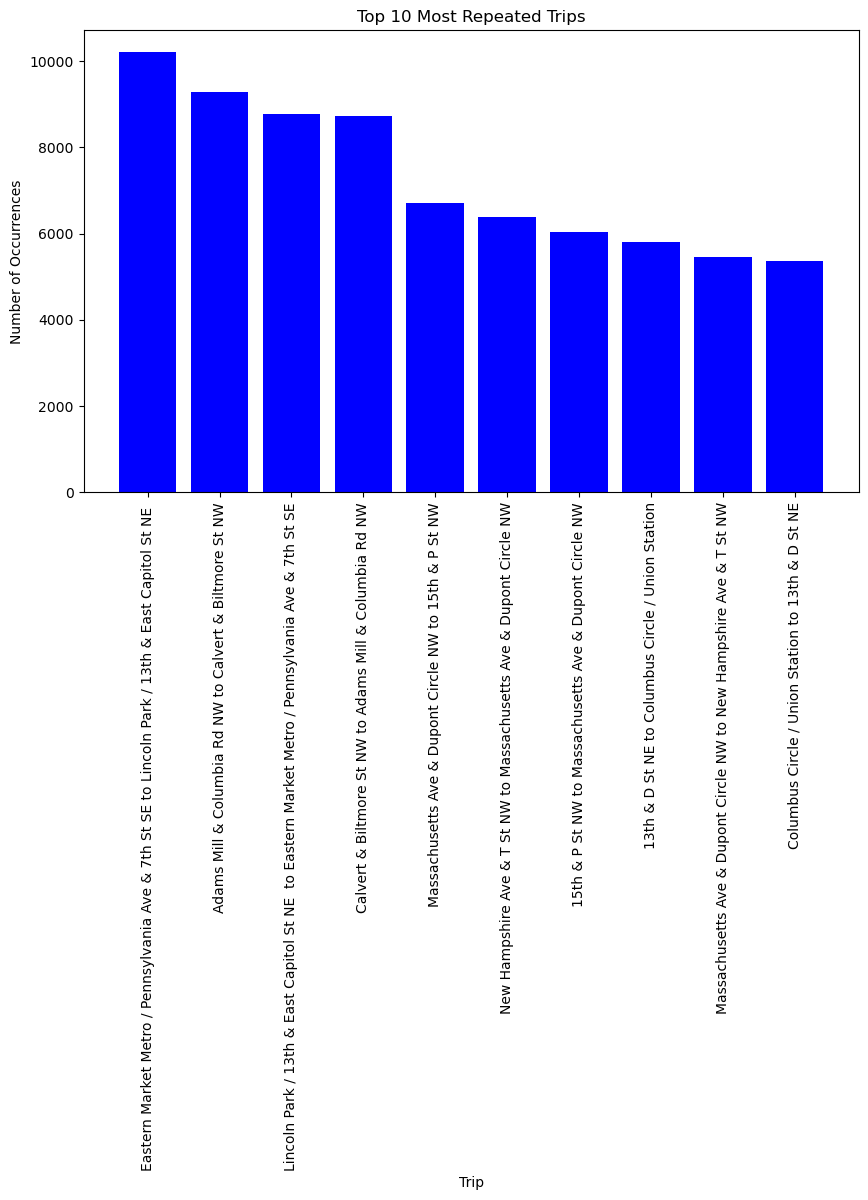

In [221]:
# create a plot bar for the top 10 trips
plt.figure(figsize=(10, 6))
plt.bar(top_trip_counts['Start station'] + ' to ' + top_trip_counts['End station'], top_trip_counts['Count'], color='blue')
plt.xlabel('Trip')
plt.ylabel('Number of Occurrences')
plt.title('Top 10 Most Repeated Trips')
plt.xticks(rotation=90)
plt.show()

In [222]:
def create_route(start_point, end_point):
    # Make a request to the OSRM API to obtain the route
    url = f'http://router.project-osrm.org/route/v1/driving/{start_point[1]},{start_point[0]};{end_point[1]},{end_point[0]}?overview=full'
    response = requests.get(url)
    route_data = response.json()

    # Extract the route geometry
    route_geometry = polyline.decode(route_data['routes'][0]['geometry'])
    route_points = [(point[0], point[1]) for point in route_geometry]

    return route_points

# Create a map with folium and the coordinates from the top_10_trips df with all the routes and the stations
m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Define a list of colors for the routes
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan']

# Add the stations to the map
for index, row in top_10_trips.iterrows():
    start_point = [row['Start station latitude'], row['Start station longitude']]
    end_point = [row['End station latitude'], row['End station longitude']]

    # Add the markers for start and end stations
    folium.Marker(start_point, popup=row['Start station']).add_to(m)
    folium.Marker(end_point, popup=row['End station']).add_to(m)

    # Check if start and end stations are the same
    if row['Start station'] == row['End station']:
        icon_color = 'orange'
    else:
        icon_color = 'green'

    # Add the markers with the appropriate color
    folium.Marker(start_point, popup=row['Start station'], icon=folium.Icon(color='green')).add_to(m)
    folium.Marker(end_point, popup=row['End station'], icon=folium.Icon(color='red')).add_to(m)

    # Create the route and add it to the map with a different color
    route_points = create_route(start_point, end_point)
    color_index = index % len(colors)  # Get the index modulo the number of colors
    route_color = colors[color_index]
    folium.PolyLine(locations=route_points, color=route_color, weight=5).add_to(m)

# Save the map
m.save('top_10_trips.html')
m